<a href="https://colab.research.google.com/github/el-danieel/dio-sistema-de-recomendacao-por-imagens-.ipynb/blob/main/dio_sistema_de_recomenda%C3%A7%C3%A3o_por_imagens_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
root = 'drive/My Drive/dataset-cats-dogs'

In [7]:
!pip install tensorflow
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

In [8]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
import cv2
import numpy as np

In [11]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

In [12]:
filename_cats=[]
feature_list_cats=[]
for file in os.listdir(root+'/cats_set'):
  try:
    filename_cats.append(os.path.join(root+'/cats_set',file))
    feature_list_cats.append(extract_feature(os.path.join(root+'/cats_set',file),model))
  except:
    pass

filename_dogs=[]
feature_list_dogs=[]
for file in os.listdir(root+'/dogs_set'):
  try:
    filename_dogs.append(os.path.join(root+'/dogs_set',file))
    feature_list_dogs.append(extract_feature(os.path.join(root+'/dogs_set',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [37]:
from sklearn.neighbors import NearestNeighbors

neighbors_cats=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_cats.fit(feature_list_cats)


distance_cats, indices_cats = neighbors_cats.kneighbors([extract_feature('gato_preto.jpg', model)])


neighbors_dogs=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_dogs.fit(feature_list_dogs)


distance_dogs, indices_dogs = neighbors_dogs.kneighbors([extract_feature('cachorro_rottweiler.jpg', model)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


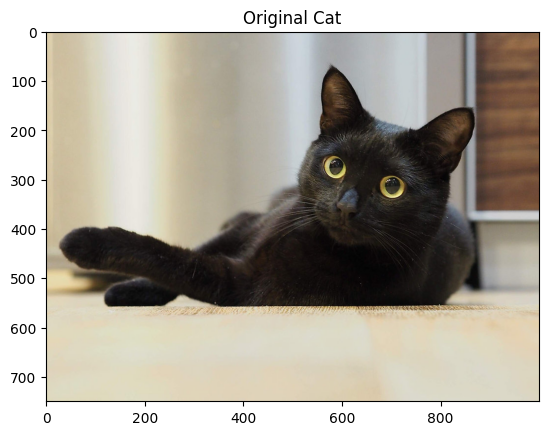

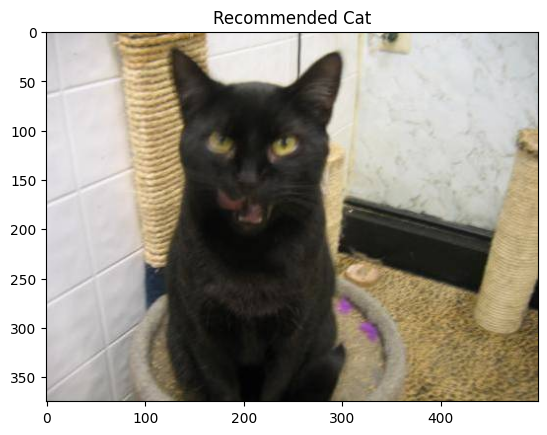

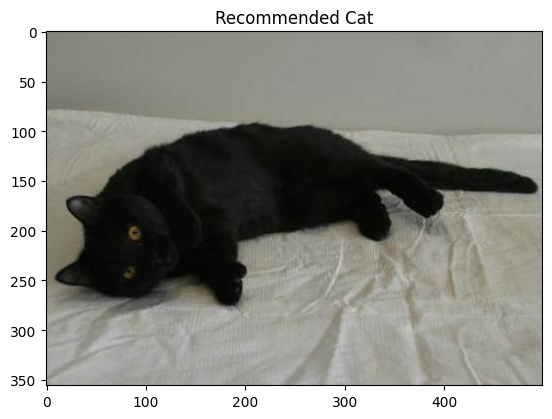

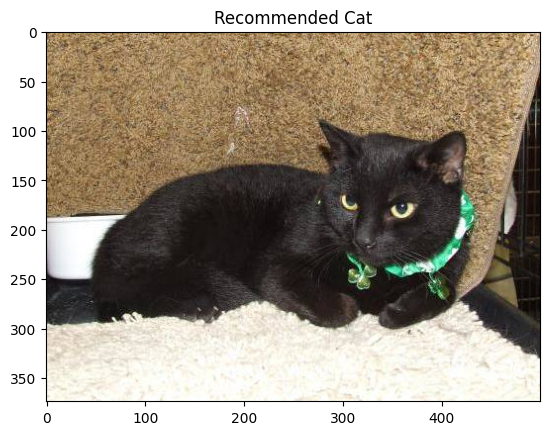

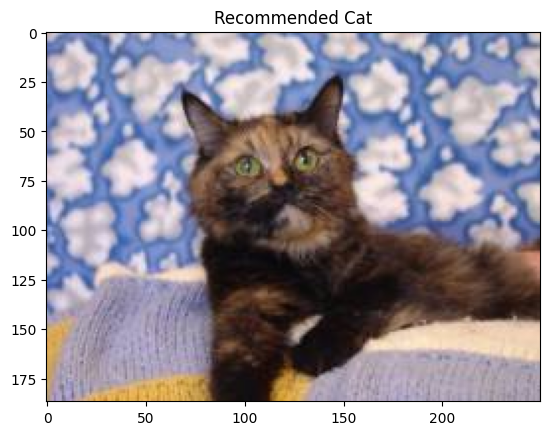

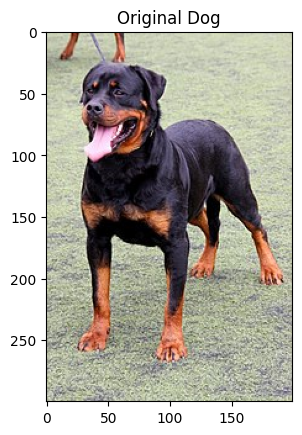

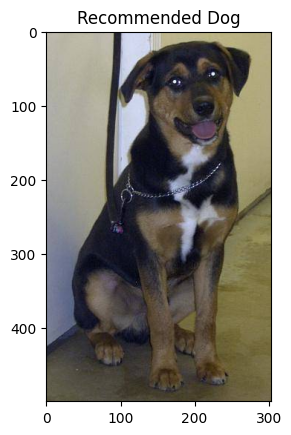

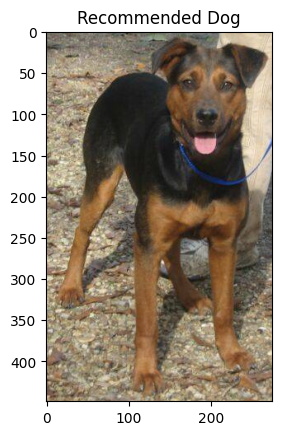

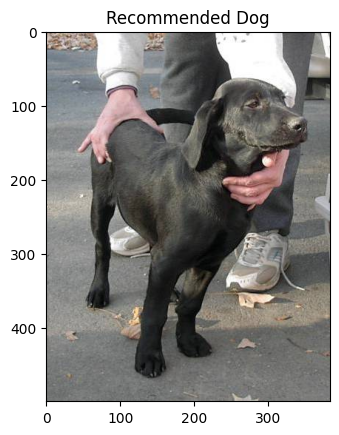

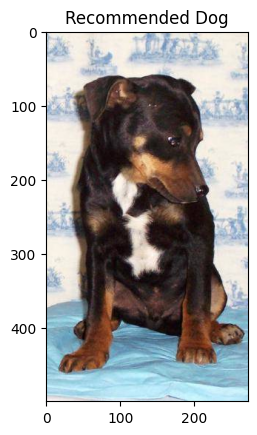

In [42]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread('gato_preto.jpg'))
plt.title("Original Cat")
plt.show()
for file_cats in indices_cats[0][1:5]:
  plt.imshow(plt.imread(filename_cats[file_cats]))
  plt.title("Recommended Cat")
  plt.show()


plt.imshow(plt.imread('cachorro_rottweiler.jpg'))
plt.title("Original Dog")
plt.show()
for file_dogs in indices_dogs[0][1:5]:
  plt.imshow(plt.imread(filename_dogs[file_dogs]))
  plt.title("Recommended Dog")
  plt.show()